In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet<2.0.0"
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 6.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━

In [ ]:
# AutoGluonをインポートする。
from autogluon.tabular import TabularDataset, TabularPredictor, FeatureMetadata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_raw_tab = pd.read_csv('drive/My Drive/ML5G-PS-005_train.csv')

In [ ]:
cycleLable_train_arr = []
for i in range(0,600):
  dt1_train = data_raw_tab['label'][70*i:70*(i+1)]
  if dt1_train[70*i] != 'normal':
    cycleLable_train_arr.append(i)

In [ ]:
ind_train_60 = []
data_train_1to12_12_tab = pd.DataFrame()

for i_cycle in range(600):
  if i_cycle in cycleLable_train_arr:
    tmp = data_raw_tab.iloc[i_cycle*70+10:i_cycle*70+16, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])
    for i in range(6):
      ind_train_60.append(i_cycle*70+59)

  else: 
    tmp = data_raw_tab.iloc[i_cycle*70:i_cycle*70+1, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    tmp = data_raw_tab.iloc[i_cycle*70+10:i_cycle*70+11, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    tmp = data_raw_tab.iloc[i_cycle*70+20:i_cycle*70+21, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    tmp = data_raw_tab.iloc[i_cycle*70+30:i_cycle*70+31, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    tmp = data_raw_tab.iloc[i_cycle*70+40:i_cycle*70+41, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    tmp = data_raw_tab.iloc[i_cycle*70+50:i_cycle*70+51, 2:]
    data_train_1to12_12_tab = pd.concat([data_train_1to12_12_tab, tmp])

    for i in range(6):
      ind_train_60.append(i_cycle*70+59)

data_failure_60 =data_raw_tab.iloc[ind_train_60, :]['amf.amf.app.five-g.RM.RegInitFail']
data_train_12_mean_failure_60_tab=data_train_1to12_12_tab
data_train_12_mean_failure_60_tab['fail60']=data_failure_60.to_numpy()
data_train_12_mean_failure_60_noTimeLable_tab=data_train_12_mean_failure_60_tab.reset_index()

print(data_failure_60.shape)
data_train_12_mean_failure_60_noTimeLable_tab.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


(3600,)


,index,amf.amf.app.cadvisor.container_cpu_cfs_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_seconds,amf.amf.app.cadvisor.container_cpu_system_seconds,amf.amf.app.cadvisor.container_cpu_usage_seconds,amf.amf.app.cadvisor.container_cpu_user_seconds,amf.amf.app.cadvisor.container_last_seen,amf.amf.app.cadvisor.container_memory_cache,amf.amf.app.cadvisor.container_memory_failcnt,...,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.min,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.count,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.min,upf.upf3.infra.tcptracer._192.168.13.70_connect.count,fail60
0,0,7.018374,0,0,0.023657,0.000310,0.040218,1646023925,23730958336,0,...,0,0,0,0,0,0,0,0,0,2
1,10,8.617313,0,0,0.030356,0.002437,0.045045,1646024024,23739338752,0,...,0,0,0,0,0,0,0,0,0,2
2,20,8.655715,0,0,0.045045,0.002922,0.066243,1646024123,23748800512,0,...,0,0,0,0,0,0,0,0,0,2
3,30,8.140671,0,0,0.035819,0.005238,0.048301,1646024223,23758127104,0,...,0,0,0,0,0,0,0,0,0,2
4,40,6.803392,0,0,0.031552,0.002177,0.032538,1646024323,23767994368,0,...,0,0,0,0,0,0,0,0,0,2
5,50,6.583112,0,0,0.034182,0.002435,0.046841,1646024423,23777050624,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
data_failure_60.head(50)

In [ ]:
#save
data_train_12_mean_failure_60_noTimeLable_tab.to_csv('drive/My Drive/data_train_12_failure_60_noTimeLable_tab_0to50_1025.csv')

In [ ]:
#read
data_train_12_mean_failure_60_noTimeLable_tab = pd.read_csv('drive/My Drive/data_train_12_failure_60_noTimeLable_tab_0to50_1025.csv')

In [ ]:
del data_train_12_mean_failure_60_noTimeLable_tab['Unnamed: 0']

In [ ]:
data_train_12_mean_failure_60_noTimeLable_tab

,index,amf.amf.app.cadvisor.container_cpu_cfs_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_seconds,amf.amf.app.cadvisor.container_cpu_system_seconds,amf.amf.app.cadvisor.container_cpu_usage_seconds,amf.amf.app.cadvisor.container_cpu_user_seconds,amf.amf.app.cadvisor.container_last_seen,amf.amf.app.cadvisor.container_memory_cache,amf.amf.app.cadvisor.container_memory_failcnt,...,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.min,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.count,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.min,upf.upf3.infra.tcptracer._192.168.13.70_connect.count,fail60
0,0,7.018374,0,0,0.023657,0.000310,0.040218,1646023925,23730958336,0,...,0,0,0,0,0,0,0,0,0,2
1,10,8.617313,0,0,0.030356,0.002437,0.045045,1646024024,23739338752,0,...,0,0,0,0,0,0,0,0,0,2
2,20,8.655715,0,0,0.045045,0.002922,0.066243,1646024123,23748800512,0,...,0,0,0,0,0,0,0,0,0,2
3,30,8.140671,0,0,0.035819,0.005238,0.048301,1646024223,23758127104,0,...,0,0,0,0,0,0,0,0,0,2
4,40,6.803392,0,0,0.031552,0.002177,0.032538,1646024323,23767994368,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,41940,8.447730,0,0,0.033791,0.002817,0.044351,1647233323,24573620224,0,...,0,0,0,0,0,0,0,0,0,3
3596,41950,8.147513,0,0,0.034305,0.002209,0.040738,1647233423,24583217152,0,...,0,0,0,0,0,0,0,0,0,3
3597,41960,8.065487,0,0,0.042133,0.001762,0.049356,1647233523,24593219584,0,...,0,0,0,0,0,0,0,0,0,3
3598,41970,8.172922,0,0,0.034412,0.002739,0.037638,1647233623,24601735168,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
%%time
dir_base_name = "drive/My Drive/model/autogluon"
dir_default = f"{dir_base_name}_1025_train_12_failure_60_reg_cpu_4h"
data_input_tab = data_train_12_mean_failure_60_noTimeLable_tab

predictor = TabularPredictor(
    label='fail60', # ターゲット
    # label='amf.amf.app.five-g.RM.RegInitFail', # ターゲット
    problem_type='regression',
    path=dir_default, # モデルを保存するディレクトリ名
    verbosity=2,
    # eval_metric="f1" ## 評価指標 Defaults to ‘accuracy’ for binary and multiclass classification and ‘root_mean_squared_error’ for regression
#     eval_metric="roc_auc" # 評価指標
#     eval_metric="precision" # 評価指標
).fit(
    train_data=data_input_tab, # トレーニングデータ
    # presets="good_quality", ## default = [‘medium_quality_faster_train’]
    presets="good_quality",
#     presets="optimize_for_deployment",
#     presets=["good_quality","optimize_for_deployment"],
    # excluded_model_types = ['CAT'],
#     feature_metadata=feature_metadata,
    # ag_args_ensemble={"fold_fitting_strategy": "sequential_local"},
    ag_args_fit={"num_gpus": 0},  # GPU の使用
     time_limit=14400 # [seconds]
#    time_limit=7200, # [seconds]
#     hyperparameters=hyperparameters
)

INFO:autogluon.tabular.predictor.predictor:Presets specified: ['high_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 14400s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "drive/My Drive/4SA/model/autogluon_1025_train_12_failure_60_reg_cpu_4h/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.15
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    3600
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 3327
INFO:autogluon.tabular.learner.default_learner:Label Column: fail60
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
INFO:autogluon.tabular.learner.de

CPU times: user 1h 9min 33s, sys: 42.3 s, total: 1h 10min 15s
Wall time: 4h 23min 29s


In [ ]:
# predictor のロード ディレクトリ名を指定する
predictor = TabularPredictor.load("drive/My Drive/model/autogluon_1025_train_norm0-50_loss10-15_failure_60_reg_cpu_4h_good",require_version_match=False)
data_test_tab = data_train_12_mean_failure_60_noTimeLable_tab

In [ ]:
score = predictor.evaluate(data_test_tab)
score

{'root_mean_squared_error': -2.3641613198367053,
 'mean_squared_error': -5.589258746212033,
 'mean_absolute_error': -1.2230009712692764,
 'r2': 0.984649356299497,
 'pearsonr': 0.9923229566182016,
 'median_absolute_error': -0.6154356896877289}

In [ ]:
data_train_raw_tab_new = pd.DataFrame()
data_train_raw_tab_new = pd.concat([data_raw_tab, data_train_raw_tab_new])
data_train_raw_tab_new.insert(0, 'index', 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
data_train_raw_tab_new

,index,time,label,amf.amf.app.cadvisor.container_cpu_cfs_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_seconds,amf.amf.app.cadvisor.container_cpu_system_seconds,amf.amf.app.cadvisor.container_cpu_usage_seconds,amf.amf.app.cadvisor.container_cpu_user_seconds,amf.amf.app.cadvisor.container_last_seen,...,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.min,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.count,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.min,upf.upf3.infra.tcptracer._192.168.13.70_connect.count
0,0,20220228135349-6_20220228135210,normal,7.018374,0,0,0.023657,0.000310,0.040218,1646023925,...,0,0,0,0,0,0,0,0,0,0
1,0,20220228135349-6_20220228135220,normal,9.210526,0,0,0.039474,0.000000,0.057018,1646023933,...,0,0,0,0,0,0,0,0,0,0
2,0,20220228135349-6_20220228135230,normal,7.632034,0,0,0.033581,0.000181,0.039687,1646023943,...,0,0,0,0,0,0,0,0,0,0
3,0,20220228135349-6_20220228135240,normal,8.720056,0,0,0.034078,0.000504,0.050115,1646023953,...,0,0,0,0,0,0,0,0,0,0
4,0,20220228135349-6_20220228135250,normal,8.348794,0,0,0.035250,0.000012,0.048237,1646023963,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,20220314134846-259_20220314135800,normal,8.192294,0,0,0.035110,0.002322,0.045013,1647233873,...,0,0,0,0,0,0,0,0,0,0
41996,0,20220314134846-259_20220314135810,normal,8.680742,0,0,0.032151,0.002409,0.046083,1647233883,...,0,0,0,0,0,0,0,0,0,0
41997,0,20220314134846-259_20220314135820,normal,7.555995,0,0,0.038679,0.002105,0.038679,1647233893,...,0,0,0,0,0,0,0,0,0,0
41998,0,20220314134846-259_20220314135830,normal,8.858377,0,0,0.043185,0.001720,0.050936,1647233903,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result_test = predictor.predict(data_train_raw_tab_new)

In [ ]:
result_test

0       1.216678
1       1.953425
2       1.381997
3       1.485231
4       1.511257
          ...   
3595    8.836592
3596    1.560746
3597    1.859551
3598    1.560470
3599    1.794552
Name: fail60, Length: 3600, dtype: float32

In [ ]:
result_train_0_60_df = pd.DataFrame()
test_failure_predict_df = pd.DataFrame()
test_normal_predict_df = pd.DataFrame()
test_failure_11_60_predict_df = pd.DataFrame()

for i_cycle in range(600):
  tmp = result_test.iloc[i_cycle*70:i_cycle*70+60]
  result_train_0_60_df =pd.concat([result_train_0_60_df, tmp])

  if i_cycle in cycleLable_train_arr:
    test_failure_predict_df=pd.concat([test_failure_predict_df, tmp])
    tmp2 = result_test.iloc[i_cycle*70+10:i_cycle*70+60]
    test_failure_11_60_predict_df=pd.concat([test_failure_11_60_predict_df, tmp2])

  else: 
    test_normal_predict_df=pd.concat([test_normal_predict_df, tmp])

In [ ]:
max(test_normal_predict_df.iloc[:,0])

43.30381774902344

In [ ]:
test_normal_predict_df.quantile(q=[0.5, 0.99])

,0
0.50,1.750680
0.99,16.753385


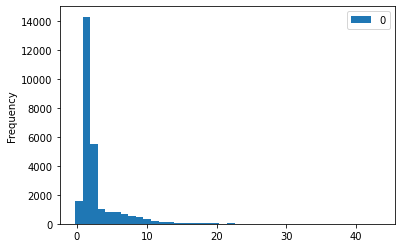

In [ ]:
test_normal_predict_df.plot.hist(bins=40)

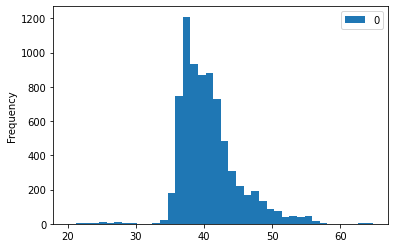

In [ ]:
test_failure_11_60_predict_df.plot.hist(bins=40)

In [ ]:
min(test_failure_11_60_predict_df.iloc[:,0])

20.11503028869629

In [ ]:
norm_099 = test_normal_predict_df.quantile(q=[0.99])
norm_099

,0
0.99,16.753385


In [ ]:
fail_001= test_failure_11_60_predict_df.quantile(q=[0.01])
fail_001

,0
0.01,34.565869


In [ ]:
[norm_099.iloc[0,0],fail_001.iloc[0,0]]

[16.753384857177597, 34.56586864471436]

In [ ]:
threshold= np.mean([norm_099.iloc[0,0],fail_001.iloc[0,0]])
threshold

25.659626750945975

In [ ]:
### test data

In [ ]:
data_test_raw_tab = pd.read_csv('drive/My Drive/ML5G-PS-005_test.csv')

In [ ]:
data_test_raw_tab_new = pd.DataFrame()
data_test_raw_tab_new = pd.concat([data_test_raw_tab, data_test_raw_tab_new])
data_test_raw_tab_new.insert(0, 'index', 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
#data_test_tab = data_test_table
result_test = predictor.predict(data_test_raw_tab_new)
#actual_test = data_test_raw_tab['amf.amf.app.five-g.RM.RegInitFail']

In [ ]:
data_test_raw_tab_new

,index,time,label,amf.amf.app.cadvisor.container_cpu_cfs_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_periods,amf.amf.app.cadvisor.container_cpu_cfs_throttled_seconds,amf.amf.app.cadvisor.container_cpu_system_seconds,amf.amf.app.cadvisor.container_cpu_usage_seconds,amf.amf.app.cadvisor.container_cpu_user_seconds,amf.amf.app.cadvisor.container_last_seen,...,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_LAST_ACK_CLOSE.usec.min,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.count,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.avg,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.max,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.med,upf.upf3.infra.tcpstates._::ffff:10.244.0.1_SYN_RECV_ESTABLISHED.usec.min,upf.upf3.infra.tcptracer._192.168.13.70_connect.count
0,0,20220321235443-7_20220321235310,normal,8.335814,0,0,0.031755,0.000053,0.039694,1647874382,...,0,0,0,0,0,0,0,0,0,0
1,0,20220321235443-7_20220321235320,normal,7.887899,0,0,0.032480,0.000000,0.049183,1647874392,...,0,0,0,0,0,0,0,0,0,0
2,0,20220321235443-7_20220321235330,normal,8.531195,0,0,0.032891,0.000000,0.037003,1647874402,...,0,0,0,0,0,0,0,0,0,0
3,0,20220321235443-7_20220321235340,normal,7.762803,0,0,0.032345,0.000000,0.050674,1647874412,...,0,0,0,0,0,0,0,0,0,0
4,0,20220321235443-7_20220321235350,normal,8.281762,0,0,0.030943,0.001874,0.046414,1647874422,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,20220327210303-7_20220327211220,normal,8.529228,0,0,0.037445,0.001003,0.045767,1648383132,...,0,0,0,0,0,0,0,0,0,0
20996,0,20220327210303-7_20220327211230,normal,8.267967,0,0,0.034980,0.001496,0.044520,1648383142,...,0,0,0,0,0,0,0,0,0,0
20997,0,20220327210303-7_20220327211240,normal,8.412619,0,0,0.035053,0.000993,0.043065,1648383152,...,0,0,0,0,0,0,0,0,0,0
20998,0,20220327210303-7_20220327211250,normal,8.489126,0,0,0.035292,0.000185,0.049599,1648383162,...,0,0,0,0,0,0,0,0,0,0


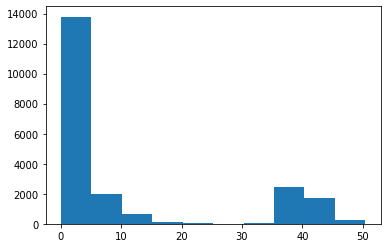

In [ ]:
plt.hist(result_test)
plt.show()
#plt.hist(actual_test)
#plt.show()

In [ ]:
#when prediction value exceeded threshold
test_over20 = [-1]*300

for i_cycle in range(300):
  for i_x in range(70):
    if result_test[i_cycle*70+i_x] >= threshold:
      if test_over20[i_cycle] == -1:
        test_over20[i_cycle] = i_x

In [ ]:
cycleLable_test_arr = []
cycleLable_test_arr_normal = []
for i in range(0,300):
  dt1_test = data_test_raw_tab['label'][70*i:70*(i+1)]
  if dt1_test[70*i] != 'normal':
    cycleLable_test_arr.append(i)
  else:
    cycleLable_test_arr_normal.append(i)

In [ ]:
test_over20_failure = []
test_over20_normal = []

for i in range(300):
  if i in cycleLable_test_arr: #failure
    test_over20_failure.append(test_over20[i])
  else:
    test_over20_normal.append(test_over20[i])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 59.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  4.]),
 array([ 4.        ,  4.11428571,  4.22857143,  4.34285714,  4.45714286,
         4.57142857,  4.68571429,  4.8       ,  4.91428571,  5.02857143,
         5.14285714,  5.25714286,  5.37142857,  5.48571429,  5.6       ,
         5.71428571,  5.82857143,  5.94285714,  6.05714286,  6.17142857,
         6.28571429,  6.4       ,  6.51428571,  6.62857143,  6.74285714,
         6.85714286,  6.97142857,  7.08571429,  7.2       ,  7.31428571,
         7.42857143,  7.54285714,  7.65714286,  7.77142857,  7.88571429,
         8.        ,  8.11428571,  8.22857143,  8.34285714,  8.45714286,
         8.57142

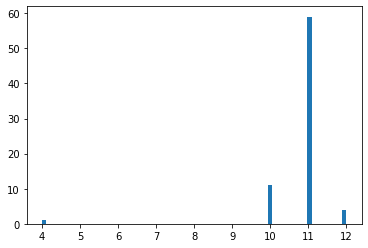

In [ ]:
plt.hist(test_over20_failure, bins=70)

(array([209.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   7.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.]),
 array([-1.        , -0.77142857, -0.54285714, -0.31428571, -0.08571429,
         0.14285714,  0.37142857,  0.6       ,  0.82857143,  1.05714286,
         1.28571429,  1.51428571,  1.74285714,  1.97142857,  2.2       ,
         2.42857143,  2.65714286,  2.88571429,  3.11428571,  3.34285714,
         3.57142857,  3.8       ,  4.02857143,  4.25714286,  4.48571429,
         4.71428571,  4.94285714,  5.17142857,  5.4       ,  5.62857143,
         5.85714286,  6.08571429,  6.31428571,  6.54285714,  6.77142857,
         7.

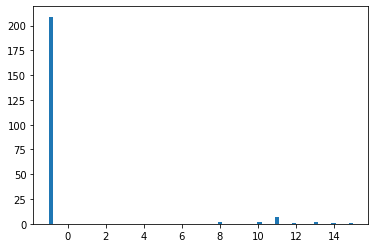

In [ ]:
plt.hist(test_over20_normal, bins=70)

In [ ]:
## classification
testy_over20_f1 = [-1]*300
testPredict_over20_f1 = [-1]*300
row_num = 11

for i_cycle in range(300):
  if i_cycle in cycleLable_test_arr:
    testy_over20_f1[i_cycle] = 1
  else:
    testy_over20_f1[i_cycle] = 0

for i in range(len(test_over20_failure)):
  if test_over20_failure[i] <= row_num and test_over20_failure[i] != -1:
    testPredict_over20_f1[cycleLable_test_arr[i]] = 1
  else:
    testPredict_over20_f1[cycleLable_test_arr[i]] = 0

for i in range(len(test_over20_normal)):
  if test_over20_normal[i] <= row_num and test_over20_normal[i] != -1:
    testPredict_over20_f1[cycleLable_test_arr_normal[i]] = 1
  else:
    testPredict_over20_f1[cycleLable_test_arr_normal[i]] = 0
  

print("f1-score: " + str(f1_score(testy_over20_f1, testPredict_over20_f1, average='macro')))

cm = confusion_matrix(testy_over20_f1, testPredict_over20_f1)
print(cm)

f1-score: 0.9352992767896939
[[214  11]
 [  4  71]]


In [ ]:
#### check end ####

In [ ]:
predictor.leaderboard(
    data_test_tab, 
    silent=True,
    # extra_metrics=["precision", "recall", "accuracy", "balanced_accuracy", "mcc"]
)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2_FULL,-4.342175,NaN,6.038856,NaN,715.982423,0.112534,NaN,5.491189,2,True,34
1,WeightedEnsemble_L3_FULL,-4.445161,NaN,8.209388,NaN,1158.649999,0.010424,NaN,0.394213,3,True,42
2,RandomForestMSE_BAG_L2_FULL,-4.516613,NaN,6.242637,NaN,981.765968,0.316315,1.081702,271.274734,2,True,36
3,XGBoost_BAG_L2_FULL,-4.520281,NaN,6.085234,NaN,722.316661,0.158913,NaN,11.825427,2,True,40
4,ExtraTreesMSE_BAG_L2_FULL,-4.563457,NaN,6.983374,NaN,776.454210,1.057052,1.120945,65.962976,2,True,38
5,CatBoost_BAG_L2_FULL,-4.593012,NaN,6.104254,NaN,852.054146,0.177932,NaN,141.562912,2,True,37
6,LightGBM_BAG_L2_FULL,-4.677476,NaN,6.047391,NaN,720.061944,0.121069,NaN,9.570710,2,True,35
7,LightGBMXT_BAG_L1_FULL,-5.528810,NaN,0.168177,NaN,8.917673,0.168177,NaN,8.917673,1,True,24
8,LightGBM_BAG_L1_FULL,-5.670452,NaN,0.109983,NaN,11.715342,0.109983,NaN,11.715342,1,True,25
9,XGBoost_BAG_L1_FULL,-5.905376,NaN,0.091182,NaN,37.413854,0.091182,NaN,37.413854,1,True,30


In [ ]:
### cheack feature importance 
# predictor.feature_importance(data_input_tab, num_shuffle_sets=20)
feature_importance=predictor.feature_importance(data_test_tab.iloc[:375, :])
feature_importance.to_csv('drive/My Drive/featureImportance_1025_train_1to12_failure_60_reg_cpu_1h_-375.csv')

In [ ]:
feature_importance.head(30)

,importance,stddev,p_value,n,p99_high,p99_low
udm.udm.infra.tcprtt._192.168.13.70_192.168.13.80.stat.avg,0.547012,0.186698,1.403258e-03,5,0.931425,0.162598
udm.udm.infra.tcprtt._192.168.13.70_192.168.13.80.stat.max,0.472601,0.148438,1.028758e-03,5,0.778237,0.166965
amf.amf.infra.tcprtt._192.168.13.80_192.168.13.70.stat.avg,0.447563,0.124625,6.524918e-04,5,0.704169,0.190958
ausf.ausf.app.cadvisor.container_memory_rss,0.392011,0.120830,9.584776e-04,5,0.640801,0.143220
upf.upf1.app.cadvisor.container_memory_rss,0.264989,0.027585,1.388979e-05,5,0.321786,0.208192
upf.upf2.app.cadvisor.container_memory_rss,0.252121,0.077773,9.613313e-04,5,0.412256,0.091985
upf.upf1.infra.runqlat.hist.bins._2_3.count,0.249793,0.069116,6.369459e-04,5,0.392105,0.107481
ausf.ausf.infra.tcprtt._192.168.13.72_192.168.13.80.hist.bins._64_127.count,0.215600,0.047424,2.636649e-04,5,0.313246,0.117954
amf.amf.app.cadvisor.container_memory_rss,0.195896,0.046698,3.598024e-04,5,0.292048,0.099744
udm.udm.infra.tcprtt._192.168.13.70_192.168.13.80.hist.bins._64_127.count,0.180883,0.100503,7.903212e-03,5,0.387820,-0.026054
